# Keys for Reddit

In [1]:
!pip -q install praw
import warnings
import praw
import pandas as pd
from secret import client_id,client_secret,password,user_agent,username,token,Data1,data1csv,Data2,data2csv,Data3,data3csv,Data4,data4csv,Data5,data5csv
                    
warnings.filterwarnings("ignore")

reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     password=password,
                     user_agent=user_agent,
                     username=username)

# NPL and ChatBot Lybraries



In [2]:

!pip -q install python-telegram-bot
!pip -q install --upgrade pip
from telegram.ext import CommandHandler, MessageHandler, Filters, Updater


!pip -q install -U ipykernel
import logging
import nltk
nltk.download('punkt',quiet=True)
nltk.download('stopwords',quiet=True)
nltk.download('wordnet',quiet=True)
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer



# NPL Data Clean

In [3]:
porter = PorterStemmer()
lancaster=LancasterStemmer()
wordnet = WordNetLemmatizer()

def lemmatize_toeknized_text(text):
    other=[wordnet.lemmatize(w) for w in text ]
    return other

def stopwords_cleaner(text):
  stoped = stopwords.words('english')
  content = [w for w in text if w.lower() not in stoped]
  return content


def get_lemma(word):
  return WordNetLemmatizer().lemmatize(word)


def prepare_text(text):
  text=TweetTokenizer().tokenize(text)
  text=stopwords_cleaner(text)
  text=lemmatize_toeknized_text(text)
  text=[get_lemma(w) for w in text]
  thematik=''
  for w in text:
    thematik=thematik+'+'+w
  thematik = thematik[1:]
  return thematik


# Data Set Constrution

In [4]:

def redditDataMine(thematik):
  
  posts = []
  Y=[thematik]
  for post in reddit.subreddit(thematik).hot(limit=10000):
      posts.append([post.subreddit, post.title])
  posts = pd.DataFrame(posts,columns=['subreddit', 'title'])
  #return str(posts.iloc[0]['subreddit'])
  alltext='title: '+str(posts.iloc[0]['subreddit'])+ ' Thematik: '+ thematik 
  return posts



# Keep DataSets

In [5]:
#dataDataScience = redditDataMine('DataScience')
redditDataMine(Data1).to_csv(data1csv)

redditDataMine(Data2).to_csv(data2csv)

redditDataMine(Data3).to_csv(data3csv)

redditDataMine(Data4).to_csv(data4csv)

redditDataMine(Data5).to_csv(data5csv)

# Upload Pandas DataSet


In [6]:
import pandas as pd

dataFrame1  = pd.read_csv(data1csv, header = 0)
dataFrame2  = pd.read_csv(data2csv, header = 0)
dataFrame3  = pd.read_csv(data3csv, header = 0)
dataFrame4  = pd.read_csv(data4csv, header = 0)
dataFrame5  = pd.read_csv(data5csv, header = 0)


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split

frames = [dataFrame1, dataFrame2, dataFrame3, dataFrame4, dataFrame5]
alldata=pd.concat(frames)

alldata_data = alldata.values[:, 2]
alldata_tarjet = alldata.values[:, 1]
#alldata_tarjet = alldata.values[:, 2]
vectorizer = TfidfVectorizer()
x_train=vectorizer.fit_transform(alldata_data)

x_train, x_test, y_train, y_test = train_test_split(x_train, alldata_tarjet, test_size=0.33, random_state=42)

# DecisionTreeClassifier

In [8]:
from sklearn import tree
treeCl = tree.DecisionTreeClassifier()
treeCl.fit(x_train, y_train)
predictionTree=treeCl.predict(x_test)
#print('DecisionTreeClassifier Vektor: ', predictionTree)
print('DecisionTreeClassifier Accuracy: ', metrics.accuracy_score(predictionTree,y_test))

DecisionTreeClassifier Accuracy:  0.7441340782122905


# MultinomialNB

In [9]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=.01)
clf.fit(x_train, y_train)
predictionNB=clf.predict(x_test)
#print('MultinomialNB Vektor: ', predictionNB,'\n','='*20)
print('MultinomialNB Accuracy: ', metrics.accuracy_score(predictionNB,y_test))

MultinomialNB Accuracy:  0.8491620111731844


# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import numpy as np

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predictionKNN=knn.predict(x_test)
metrics.accuracy_score(predictionKNN,y_test)
#print('KNN Vektor: ', predictionKNN)
print('KNN Accuracy: ', metrics.accuracy_score(predictionKNN,y_test))

KNN Accuracy:  0.7821229050279329


# MLPClassifier

In [11]:
from sklearn.neural_network import MLPClassifier
Nn=MLPClassifier()
Nn.fit(x_train,y_train)
predictionNn=Nn.predict(x_test)
metrics.accuracy_score(predictionNn,y_test)
#print('Nn Vektor: ', predictionNn)
print('MLPC Accuracy: ', metrics.accuracy_score(predictionNn,y_test))

MLPC Accuracy:  0.8614525139664805


#  LinearSVC

In [12]:
from sklearn.svm import LinearSVC
svc =LinearSVC()
svc.fit(x_train,y_train)
predictionSvc=svc.predict(x_test)
metrics.accuracy_score(predictionSvc,y_test)
#print('Nn Vektor: ', predictionSvc)
print('Linear Accuracy: ', metrics.accuracy_score(predictionSvc,y_test))

Linear Accuracy:  0.8670391061452514


# Validation Curves KNN

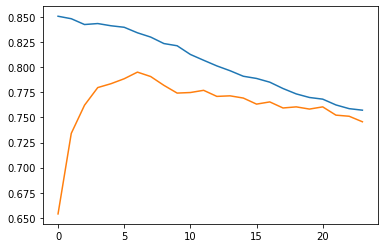

In [13]:
from sklearn.model_selection import validation_curve
n=np.arange(2,50,2)
train_scores, test_scores = validation_curve(KNeighborsClassifier(),
                                             x_train,
                                             y_train,
                                             param_name='n_neighbors',
                                             param_range=n,
                                             cv=5)
plt.plot(np.mean(train_scores,axis=1))
plt.plot(np.mean(test_scores,axis=1))

# Lerning Curves DecisionTreeClassifier

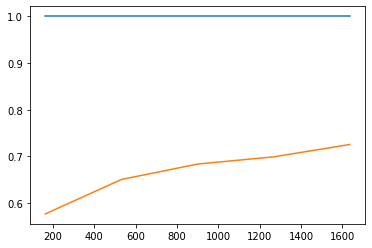

In [14]:
from sklearn.model_selection import learning_curve
lc=learning_curve(tree.DecisionTreeClassifier(),x_train,y_train,cv=10)
samples, train, test = lc[0], lc[1], lc[2]
plt.plot(samples,np.mean(train,axis=1))
plt.plot(samples,np.mean(test,axis=1))

# Lerning Curves MultinomialNB

[ 136  442  749 1055 1362]
[[1.         1.         1.         1.        ]
 [1.         0.99773756 0.99773756 0.99773756]
 [0.99732977 0.99866489 0.99866489 0.99866489]
 [0.99526066 0.99810427 0.99620853 0.99526066]
 [0.99559471 0.99632893 0.99559471 0.99559471]]
[1.         0.99830317 0.99833111 0.99620853 0.99577827]


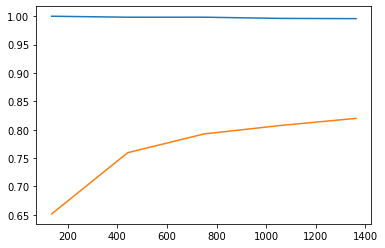

In [15]:
from sklearn.model_selection import learning_curve
lc=learning_curve(MultinomialNB(alpha=.01),x_train,y_train,cv=4,n_jobs=4)
samples, train, test = lc[0], lc[1], lc[2]
print(samples)
print('='*50)
print(train)
print('='*50)
print(np.mean(train,axis=1))

plt.plot(samples,np.mean(train,axis=1))
plt.plot(samples,np.mean(test,axis=1))

# Lerning Curves KNeighborsClassifier

[ 145  472  799 1126 1453]
[0.78068966 0.83728814 0.84355444 0.84422735 0.84735031]


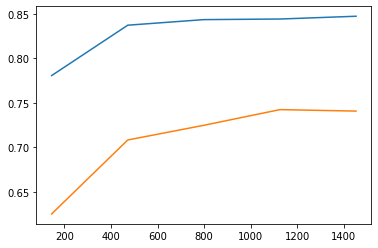

In [16]:
from sklearn.model_selection import learning_curve
lc=learning_curve(KNeighborsClassifier(n_neighbors=5),x_train,y_train,cv=5)
samples, train, test = lc[0], lc[1], lc[2]
print(samples)
print(np.mean(train,axis=1))
plt.plot(samples,np.mean(train,axis=1))
plt.plot(samples,np.mean(test,axis=1))

# ChatBot Code

In [17]:
message =("Hello nice to see you here :D" +  
          "\nI'm a Bot to research Text" +  
          "\nClassifiation applications" +  
          "\nyou can find my code and more" + 
          "\ninformation about me here: \n https://github.com/SantiRey/TextClasifficationRedditTelegram")

logging.basicConfig(
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    level=logging.INFO
)


def start(update, context):
    """Start the bot."""
    context.bot.send_message(
        chat_id=update.effective_chat.id,
        text= message
    )


def echo(update, context):
    """Echo the same received message"""
    #predict=clf.predict(x_test)  
    context.bot.send_message(
        chat_id=update.effective_chat.id,
        text='after NLP: '+prepare_text(update.message.text)+' Topic: '+str(clf.predict(vectorizer.transform([prepare_text(update.message.text)]))[0])
    )


if __name__ == '__main__':
    # Launch the bot (Updater)
    updater = Updater(
        token=token,  
        use_context=True
    )

    # register the handlers
    dispatcher = updater.dispatcher

    start_handler = CommandHandler('start', start)
    dispatcher.add_handler(start_handler)

    echo_handler = MessageHandler(Filters.text & (~Filters.command), echo)
    dispatcher.add_handler(echo_handler)

    # start the bot
    updater.start_polling()


# Lerning Curves MLPClassifier

[ 145  472  799 1126 1453]
[1.         1.         1.         0.99982238 0.99944942]


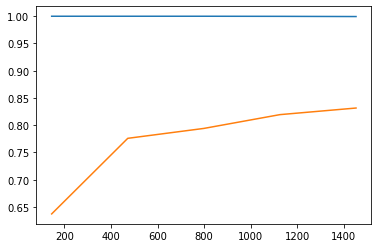

In [18]:
from sklearn.model_selection import learning_curve
lc=learning_curve(MLPClassifier(),x_train,y_train,cv=5,n_jobs=4)
samples, train, test = lc[0], lc[1], lc[2]
print(samples)
print(np.mean(train,axis=1))
plt.plot(samples,np.mean(train,axis=1))
plt.plot(samples,np.mean(test,axis=1))
